<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Betsy Torres | Daniel Castillo

**Fecha:** 24 octubre 2020.

**Expediente** : 714095 | .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Liga GitHub:** https://github.com/BetsyTorres/ProyectoConjunto_BTorres_DCastillo/blob/master/Tarea_4.ipynb
    
# Tarea 4: Clase 13

### <font color = 'red'> Enunciado de la tarea:
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    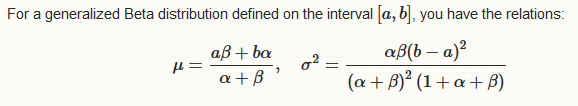
> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.
    
>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.

**Parámetros de entrega**
Se habilitará un enlace en Canvas donde deben de subir su cuaderno de python con la solución dada. La fecha límite de recepción será el jueves 15 de octubre a las 18:00.

>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    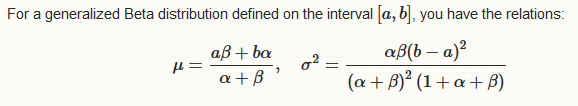
> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

In [111]:
# Librerías 
from scipy.optimize import fsolve
import scipy.stats as st 
from scipy.stats import triang  
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Sol 1 Betsy Torres

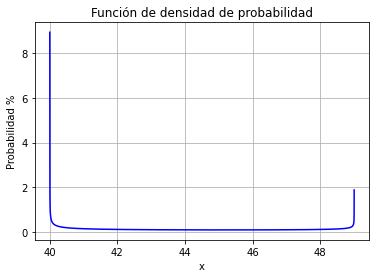

In [127]:
# Utilizando los datos del caso de estudio 1
miu, sigma, d = 44, 3, 47
#Límites inferior y superior
a, b= 40, 49

def func(x: 'Vector de valores para alpha y beta'):
    'Función para conocer alpha y beta a partir de miu y sigma proporcionados'
    return [miu-((a*x[0]+b*x[1])/(x[1]+x[0])),
            sigma**2-((x[1]*x[0]*(b-a)**2)/(((x[1]+x[0])**2)*(1+x[1]+x[0])))]
    
b_a=fsolve(func, [1,1])
# b_a

x = np.linspace(a,b, 100000)
y_acum = st.beta.cdf(x,beta_alpha[1], beta_alpha[0], scale=(b-a), loc=a)
y=st.beta.pdf(x,beta_alpha[1], beta_alpha[0], scale=(b-a), loc=a)

plt.plot(x, y, color='b')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.title('Función de densidad de probabilidad')
plt.grid()
plt.show()

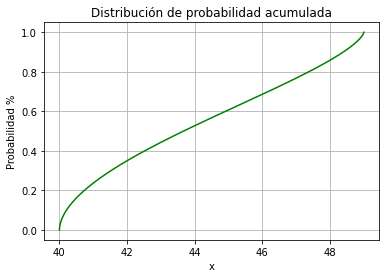

In [126]:
plt.plot(x, y_acum, color='g')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.title('Función de distribución de probabilidad')
plt.grid()
plt.show()

In [101]:
p_b=st.beta.cdf(d,b_a[1], b_a[0], scale=(b-a), loc=a)
print("P (T <= d) =", p_b*100, "%" )

P (T <= d) = 76.77251926284654 %


## Sol 1 Daniel Castillo



>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


## Sol 2 Betsy Torres

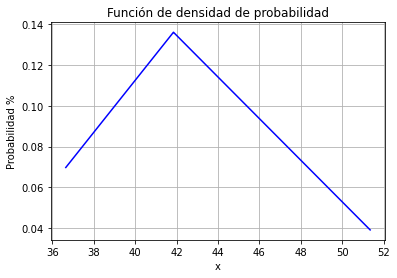

In [128]:
# Sol 1 Betsy Torres
p, o = 49, 40

miu, sigma, d = 44, 3, 47

def triang(x):
    'Función que genera el valor esperado, la varianza y mediana de la distrubucuón triangular basada en las fórmulas de cada parámentro'
    a = x[0]
    b = x[1]
    c = x[2]
    media = ((a+b+c)/ 3)-miu
    varianza = ((a**2 + b**2 + c**2 - (a*b) - (a*c) - (b*c))/18) - sigma**2
    mediana = c - miu
    return np.array([media,varianza,mediana])

t = fsolve(triang, [0,0,0])
# t

a_t = t[0]; b_t = t[1]
x_t = np.linspace(a_t,b_t, 100000)
y_acumt = st.triang.cdf(x_t, c, loc=a_t, scale=(b_t-a_t))
y_t = st.triang.pdf(x, c, loc=a_t, scale=(b_t-a_t))

plt.plot(x_t, y_t, c='b')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.title('Función de densidad de probabilidad')
plt.grid()
plt.show()

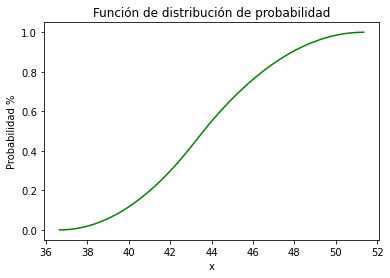

In [129]:
plt.plot(x_t, y_acumt, 'g')
plt.grid()
plt.title('Función de distribución de probabilidad')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.grid()
plt.show()

In [105]:
c = (t[2]-a)/(b-a)
p_t = st.triang.cdf(d, c1, loc=a, scale=(b-a))
print('P ( T <= d )=',p_t*100,'%')

P ( T <= d )= 91.11111111111111 %


## Sol 2 Daniel Castillo